## Observations and Insights 

In [252]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import mode

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse = pd.merge(mouse_metadata,study_results,on="Mouse ID")
mouse.head()
# Display the data table for preview
mouse.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [253]:
# Checking the number of mice.
mouse["Mouse ID"].value_counts()

g989    13
b879    10
k894    10
l897    10
c264    10
        ..
b447     1
n482     1
l872     1
h428     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [254]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse = mouse.set_index("Mouse ID")
mouse.head()


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


In [255]:
mouseclean = mouse.drop(index=["g989"])
mouseclean.index.value_counts()

v991    10
j913    10
k894    10
l897    10
c264    10
        ..
d133     1
t573     1
v199     1
b447     1
u153     1
Name: Mouse ID, Length: 248, dtype: int64

In [256]:
# Optional: Get all the data for the duplicate mouse ID. 



In [257]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [258]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [259]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mousecleanr = mouseclean.groupby(["Drug Regimen"])
mousecleanr.head()
mousemean = mousecleanr["Tumor Volume (mm3)"].mean()
mousemedian = mousecleanr["Tumor Volume (mm3)"].median()
mousevar = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
mousesta = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
mousesem = mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

In [260]:
reg = pd.DataFrame({
    "Mean" : mousemean,
    "Median" : mousemedian,
    "Variance" : mousevar,
    "Standard Deviation" : mousesta,
    "SEM" : mousesem
})
reg.head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [261]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mouseclean.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"]).rename(columns={"mean": "Mean", "median":"Median","var":"Variance","std":"Standard Deviation","sem":"SEM"}).head()

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [273]:
mouseclean.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
k403,Ramicane,Male,21,16,0,45.000000,0
k403,Ramicane,Male,21,16,5,38.825898,0
k403,Ramicane,Male,21,16,10,35.014271,1
k403,Ramicane,Male,21,16,15,34.223992,1
k403,Ramicane,Male,21,16,20,32.997729,1


## Bar and Pie Charts

[]

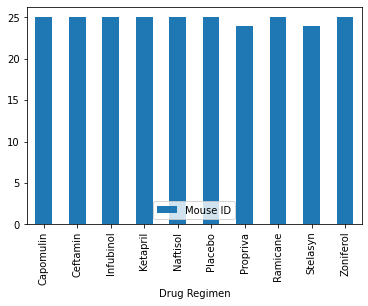

In [302]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
panbar = mouseclean.reset_index(drop=False).set_index("Drug Regimen")
num = panbar.groupby("Drug Regimen")["Mouse ID"].nunique()
num
pandbar = num.plot.bar
pandchar = pd.DataFrame(num)
pandaschart = pandchar.plot.bar()
pandaschart.plot()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

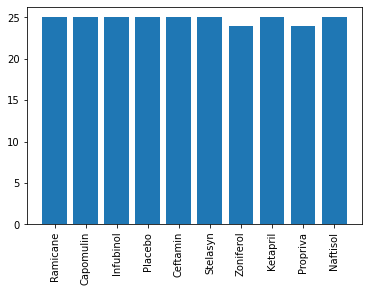

In [320]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
x_axis = mouseclean["Drug Regimen"].unique()
pltchart = plt.bar(x_axis, num)
plt.xticks(rotation="vertical")

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
